In [117]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1 as f1
import fastf1.plotting
from fastf1.core import Laps
import numpy as np

In [118]:
# Enable Matplotlib patches for plotting timedelta values
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

In [119]:
# Cargamos una carpeta cache para guardar los datos descargados
f1.Cache.enable_cache('cache')

In [120]:
# Cargamos los datos del GRAN PREMIO D’ITALIA 2024 (Qualifying)
qualy = f1.get_session(2024, 16, 'Q')

In [121]:
# Cargamos la informacion de la carrera
qualy.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '63', '16', '55', '44', '1', '11', '23', '27', '14', '3', '20', '10', '31', '22', '18', '43', '77', '24']


## Diferencia de la vuelta más rapida de cada piloto con la vuelta de pole

In [122]:
# Armamos un Pandas con todos los pilotos
drivers = pd.unique(qualy.laps['Driver'])
print(drivers)

# Seleccionamos la vuelta más rapida de cada piloto, las ordenamos y las reseteamos
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = qualy.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps) \
    .sort_values(by='LapTime') \
    .reset_index(drop=True)
    
# Calculamos la diferencia de tiempo con la vuelta de pole
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

['NOR' 'PIA' 'RUS' 'LEC' 'SAI' 'HAM' 'VER' 'PER' 'ALB' 'HUL' 'ALO' 'RIC'
 'MAG' 'GAS' 'OCO' 'TSU' 'STR' 'COL' 'BOT' 'ZHO']


In [123]:
# Mostramos la tabla obtenida
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     NOR 0 days 00:01:19.327000        0 days 00:00:00
1     PIA 0 days 00:01:19.436000 0 days 00:00:00.109000
2     RUS 0 days 00:01:19.440000 0 days 00:00:00.113000
3     LEC 0 days 00:01:19.461000 0 days 00:00:00.134000
4     SAI 0 days 00:01:19.467000 0 days 00:00:00.140000
5     HAM 0 days 00:01:19.513000 0 days 00:00:00.186000
6     VER 0 days 00:01:19.662000 0 days 00:00:00.335000
7     PER 0 days 00:01:20.062000 0 days 00:00:00.735000
8     ALB 0 days 00:01:20.299000 0 days 00:00:00.972000
9     HUL 0 days 00:01:20.339000 0 days 00:00:01.012000
10    ALO 0 days 00:01:20.421000 0 days 00:00:01.094000
11    RIC 0 days 00:01:20.479000 0 days 00:00:01.152000
12    MAG 0 days 00:01:20.698000 0 days 00:00:01.371000
13    GAS 0 days 00:01:20.738000 0 days 00:00:01.411000
14    OCO 0 days 00:01:20.764000 0 days 00:00:01.437000
15    TSU 0 days 00:01:20.945000 0 days 00:00:01.618000
16    STR 0 days 00:01:21.013000 0 days 00:00:01

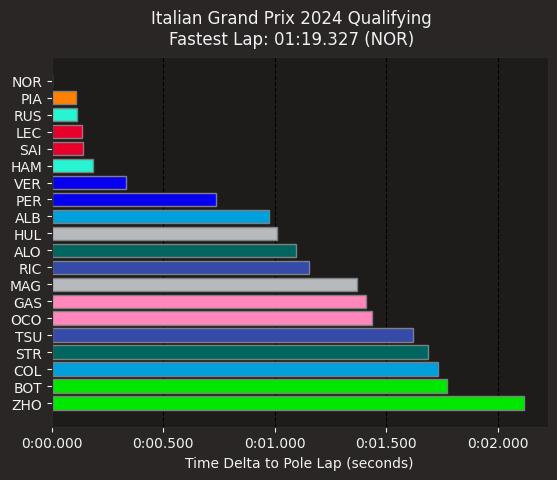

In [124]:
# Inicializamos una lista de colores para cada equipo
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=qualy)
    team_colors.append(color)

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# Invertimos el eje y para que el piloto más rápido esté en la parte superior
ax.invert_yaxis()

# Mostramos lineas de la cuadrícula
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

ax.set_xlabel('Time Delta to Pole Lap (seconds)')
plt.suptitle(f"{qualy.event['EventName']} {qualy.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.show()

## Sectores más rapidos

In [125]:
pilotos = [
    qualy.laps.pick_driver('NOR').pick_fastest(),
    qualy.laps.pick_driver('PIA').pick_fastest(),
    qualy.laps.pick_driver('RUS').pick_fastest(),
    qualy.laps.pick_driver('LEC').pick_fastest(),
    qualy.laps.pick_driver('SAI').pick_fastest(),
    qualy.laps.pick_driver('HAM').pick_fastest(),
    qualy.laps.pick_driver('VER').pick_fastest(),
    qualy.laps.pick_driver('PER').pick_fastest(),
    qualy.laps.pick_driver('ALB').pick_fastest(),
    qualy.laps.pick_driver('HUL').pick_fastest(),
    qualy.laps.pick_driver('ALO').pick_fastest(),
    qualy.laps.pick_driver('RIC').pick_fastest(),
    qualy.laps.pick_driver('MAG').pick_fastest(),
    qualy.laps.pick_driver('GAS').pick_fastest(),
    qualy.laps.pick_driver('OCO').pick_fastest(),
    qualy.laps.pick_driver('TSU').pick_fastest(),
    qualy.laps.pick_driver('STR').pick_fastest(),
    qualy.laps.pick_driver('COL').pick_fastest(),
    qualy.laps.pick_driver('BOT').pick_fastest(),
    qualy.laps.pick_driver('ZHO').pick_fastest()
]

In [126]:
# Extraemos los tiempos de cada sector para cada piloto
sector1_times = [lap['Sector1Time'].total_seconds() for lap in pilotos]
sector2_times = [lap['Sector2Time'].total_seconds() for lap in pilotos]
sector3_times = [lap['Sector3Time'].total_seconds() for lap in pilotos]
drivers = [lap['Driver'] for lap in pilotos]

C:\Users\Laura\AppData\Local\Temp\ipykernel_10132\192317894.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_drivers_s1, rotation=45)
C:\Users\Laura\AppData\Local\Temp\ipykernel_10132\192317894.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(sorted_drivers_s2, rotation=45)
C:\Users\Laura\AppData\Local\Temp\ipykernel_10132\192317894.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(sorted_drivers_s3, rotation=45)


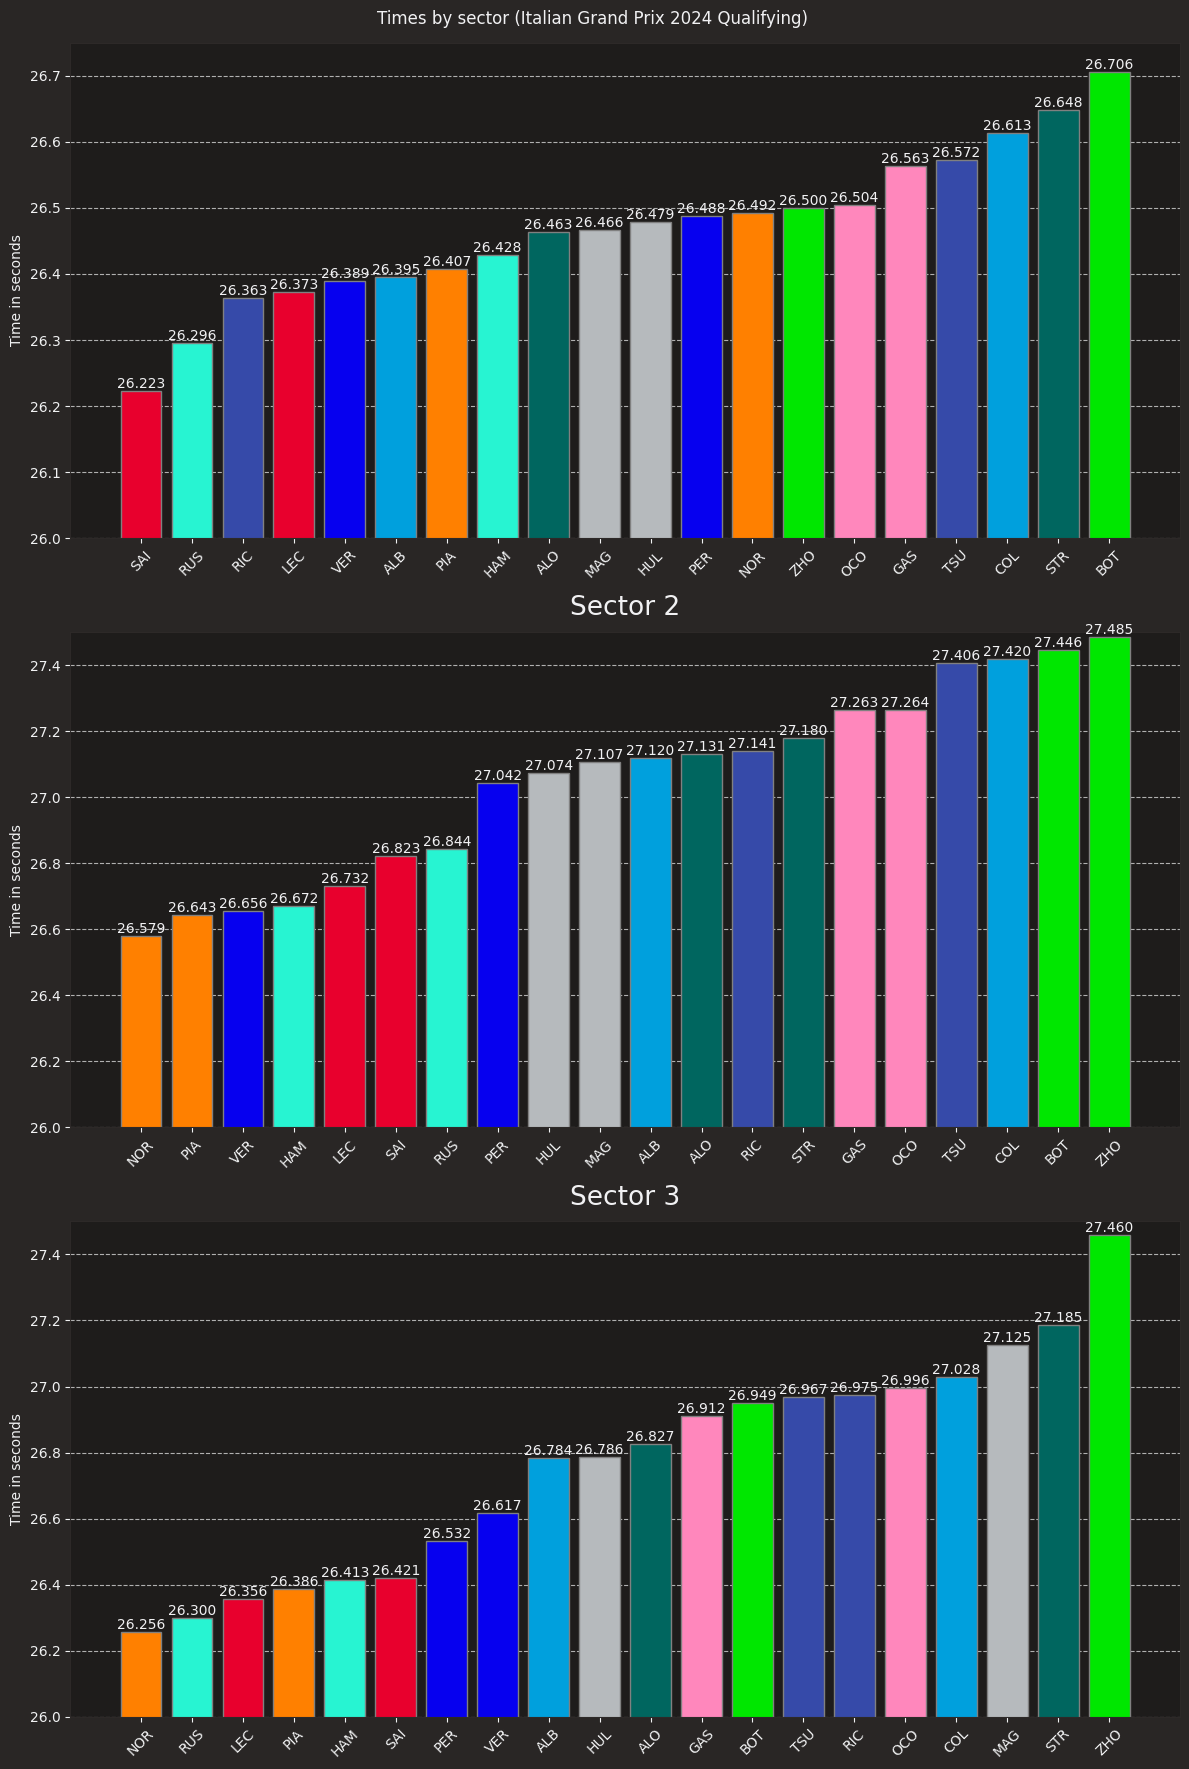

In [127]:
# Configuramos el gráfico de barras
x = np.arange(len(drivers))  # la posición de los pilotos en el eje x

# Ordenamos los tiempos de cada sector de menor a mayor
sorted_indices_s1 = np.argsort(sector1_times)
sorted_indices_s2 = np.argsort(sector2_times)
sorted_indices_s3 = np.argsort(sector3_times)

# Reordenamos los tiempos y los pilotos
sorted_sector1_times = np.array(sector1_times)[sorted_indices_s1]
sorted_sector2_times = np.array(sector2_times)[sorted_indices_s2]
sorted_sector3_times = np.array(sector3_times)[sorted_indices_s3]
sorted_drivers_s1 = np.array(drivers)[sorted_indices_s1]
sorted_drivers_s2 = np.array(drivers)[sorted_indices_s2]
sorted_drivers_s3 = np.array(drivers)[sorted_indices_s3]
sorted_team_colors_s1 = np.array(team_colors)[sorted_indices_s1]
sorted_team_colors_s2 = np.array(team_colors)[sorted_indices_s2]
sorted_team_colors_s3 = np.array(team_colors)[sorted_indices_s3]

# Creamos un gráfico con 3 subgráficos
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle(f'Times by sector ({qualy.event["EventName"]} {qualy.event.year} Qualifying) \n')

# Gráfico para el Sector 1
bars1 = ax1.bar(sorted_drivers_s1, sorted_sector1_times, color=sorted_team_colors_s1, edgecolor='grey')
ax1.set_ylabel('Time in seconds')
ax1.set_xticklabels(sorted_drivers_s1, rotation=45)
ax1.set_ylim(26, 26.75)
ax1.yaxis.grid(True, linestyle='--')

# Añadimos los tiempos encima de cada barra
for bar, time in zip(bars1, sorted_sector1_times):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{time:.3f}', ha='center', va='bottom')

# Gráfico para el Sector 2
bars2 = ax2.bar(sorted_drivers_s2, sorted_sector2_times, color=sorted_team_colors_s2, edgecolor='grey')
ax2.set_ylabel('Time in seconds')
ax2.set_title('Sector 2')
ax2.set_xticklabels(sorted_drivers_s2, rotation=45)
ax2.set_ylim(26, 27.5)
ax2.yaxis.grid(True, linestyle='--')

# Añadimos los tiempos encima de cada barra
for bar, time in zip(bars2, sorted_sector2_times):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{time:.3f}', ha='center', va='bottom')

# Gráfico para el Sector 3
bars3 = ax3.bar(sorted_drivers_s3, sorted_sector3_times, color=sorted_team_colors_s3, edgecolor='grey')
ax3.set_ylabel('Time in seconds')
ax3.set_title('Sector 3')
ax3.set_xticklabels(sorted_drivers_s3, rotation=45)
ax3.set_ylim(26, 27.5)
ax3.yaxis.grid(True, linestyle='--')

# Añadimos los tiempos encima de cada barra
for bar, time in zip(bars3, sorted_sector3_times):
    ax3.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{time:.3f}', ha='center', va='bottom')

# Ajustamos el layout para que no se solapen los subgráficos
plt.tight_layout()
plt.show()

## Velocidad maxima conseguida por cada piloto

In [128]:
# Lista donde guardaremos los datos de velocidad maxima obtenida por cada piloto y el estado del DRS
tel_pilotos = []

# Como ya tenemos una lista que contiene la vuelta más rapida de cada piloto, vamos a iterar sobre ella
#para extraer la telemetria de cada piloto y obtener la velocidad máxima y el estado del DRS
for piloto in pilotos:
    aux = piloto.get_car_data().add_distance()
    pilot = piloto["Driver"]
    maximo = aux["Speed"].max()
    drs_status = aux.loc[aux['Speed'] == maximo, 'DRS'].values
    sector_pista = aux.loc[aux['Speed'] == maximo, 'Distance'].values
    
    # Condicionales para identificar el estado del DRS
    if (drs_status == 8).any():
        drs = "Desactivado"
    elif np.isin(drs_status, [10, 12, 14]).any():
        drs = "Activado"
    else:
        drs = "Desconocido"
        
    # Condicionales para saber el sector exacto de la pista donde se alcanzó la velocidad máxima
    if (sector_pista < 900).any():
        sector_pista = "Recta principal"
    elif (sector_pista >= 3000) & (sector_pista < 4000):
        sector_pista = "Recta despues de Lesmo 2"
    elif (sector_pista >= 4100) & (sector_pista < 5100):
        sector_pista = "Recta antes de la parabolica"
    else:
        sector_pista = "Desconocido"
        
# Finalmente añaadimos los datos a la lista
    tel_pilotos.append([pilot, maximo, drs, sector_pista])

In [129]:
# Ordenamos la lista tel_pilotos por la velocidad máxima
tel_pilotos_sorted = sorted(tel_pilotos, key=lambda x: x[1], reverse=True)

# Invertir el orden de los datos para que sea de mayor a menor en el grafico
tel_pilotos_sorted.reverse()

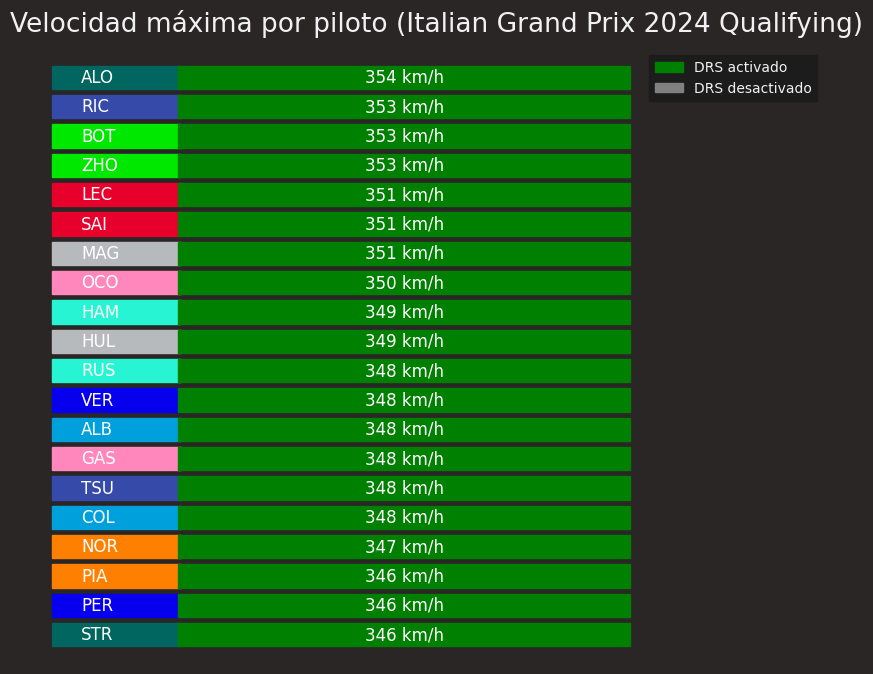

In [130]:
fig, ax = plt.subplots(figsize=(10, 8))

# Definir los colores para el DRS activado y desactivado
drs_colors = {'Activado': 'green', 'Desactivado': 'grey'}

# Iterar sobre los datos de los pilotos y sus velocidades
for i, (pilot, speed, drs, sector_pista) in enumerate(tel_pilotos_sorted):
    
    # Obtener el color del equipo del piloto
    team_color = fastf1.plotting.get_team_color(qualy.laps.pick_driver(pilot).pick_fastest()['Team'], session=qualy)
    
    # Dibujar el rectángulo con el nombre del piloto
    ax.add_patch(plt.Rectangle((0.1, i-0.4), 4, 0.8, color=team_color))
    ax.text(1, i, pilot, va='center', ha='left', fontsize=12, color='white')
    
    # Dibujar el rectángulo con la velocidad
    rect_color = drs_colors[drs]
    ax.add_patch(plt.Rectangle((4, i-0.4), 14, 0.8, color=rect_color))
    
    # Dibujar la velocidad dentro del rectángulo
    ax.text(4 + 7, i, f'{speed} km/h', va='center', ha='center', fontsize=12, color='white')
    
    # Dibujar el sector donde se consiguió la velocidad
    #ax.text(4 + 24 + 0.5, i, sector_pista, va='center', ha='left', fontsize=12)

# Configurar gráfico
ax.title.set_text(f'Velocidad máxima por piloto ({qualy.event["EventName"]} {qualy.event.year} Qualifying)')
ax.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='green', label='DRS activado'),
                   plt.Rectangle((0, 0), 1, 1, color='grey', label='DRS desactivado')],
            loc='upper right')
ax.set_xlim(0, 24)
ax.set_ylim(-1, len(tel_pilotos_sorted))
ax.axis('off')

plt.show()

## Comparación de vuelta rapida de los pilotos de Williams:

In [131]:
# Seleccionamos la vuelta más rapida de cada piloto de Williams
col_vuelta = qualy.laps.pick_driver('COL').pick_fastest()
alb_vuelta = qualy.laps.pick_driver('ALB').pick_fastest()

# Telemetria de la vuelta más rapida de cada uno
col_tel = col_vuelta.get_car_data().add_distance()
alb_tel = alb_vuelta.get_car_data().add_distance()

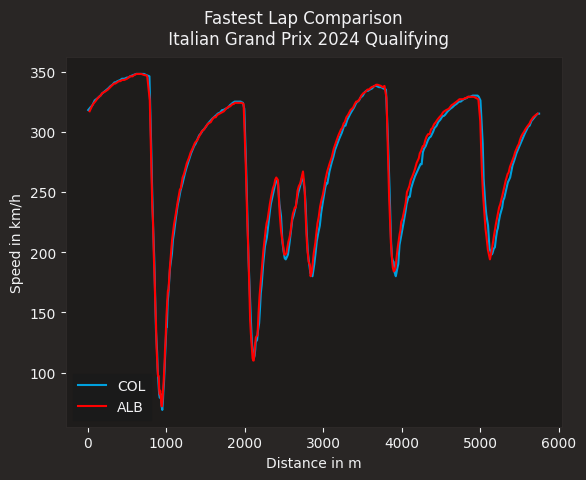

In [132]:
wil1_color = fastf1.plotting.get_team_color(col_vuelta['Team'], session=qualy)
wil2_color = 'red'

fig, ax = plt.subplots()
ax.plot(col_tel['Distance'], col_tel['Speed'], color=wil1_color, label='COL')
ax.plot(alb_tel['Distance'], alb_tel['Speed'], color=wil2_color, label='ALB')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{qualy.event['EventName']} {qualy.event.year} Qualifying")

plt.show()

## Velocidad obtenida por Colapinto en cada curva en su vuelta más rapida

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


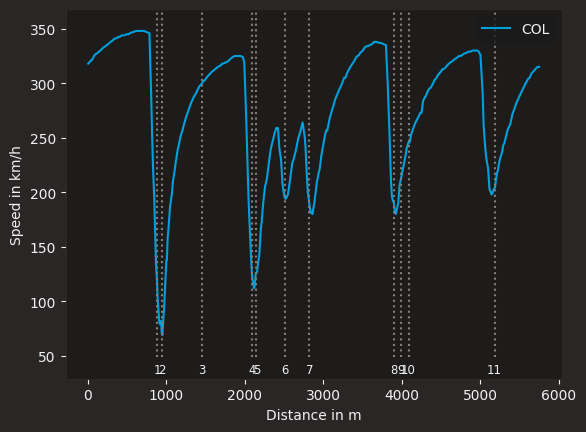

In [133]:
circuit_info = qualy.get_circuit_info()

team_color = fastf1.plotting.get_team_color(col_vuelta['Team'], session=qualy)

fix, ax = plt.subplots()
ax.plot(col_tel['Distance'], col_tel['Speed'], color=team_color, label=col_vuelta['Driver'])

# Agrega lineas verticales para cada curva
v_min = col_tel['Speed'].min()
v_max = col_tel['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Enumera las curvas
for _, corner in circuit_info.corners.iterrows():
        txt = f"{corner['Number']}{corner['Letter']}"
        ax.text(corner['Distance'], v_min-30, txt, va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Agrandamos los limites del eje Y para mejorar la visualizacion
ax.set_ylim([v_min - 40, v_max + 20])

plt.show()

### Comparación de velocidad en la vuelta más rapida de Norris y Colapinto

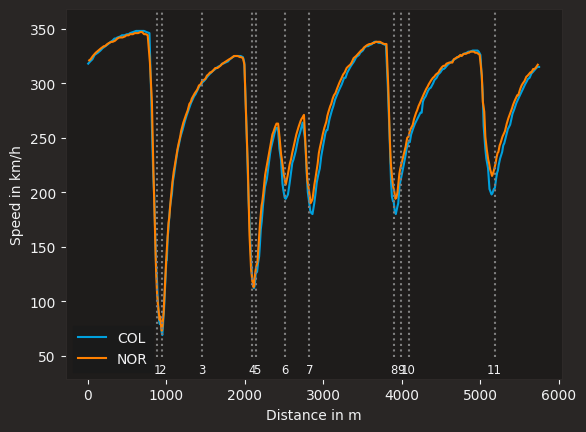

In [134]:
# Obtener la vuelta más rápida de Norris
norris_vuelta = qualy.laps.pick_driver('NOR').pick_fastest()
norris_tel = norris_vuelta.get_car_data().add_distance()

# Obtener el color del equipo de Norris
norris_color = fastf1.plotting.get_team_color(norris_vuelta['Team'], session=qualy)

# Crear el gráfico
fig, ax = plt.subplots()

# Agregar la telemetría de Colapinto
ax.plot(col_tel['Distance'], col_tel['Speed'], color=team_color, label=col_vuelta['Driver'])

# Agregar la telemetría de Norris
ax.plot(norris_tel['Distance'], norris_tel['Speed'], color=norris_color, label=norris_vuelta['Driver'])

# Agregar líneas verticales para cada curva
v_min = min(col_tel['Speed'].min(), norris_tel['Speed'].min())
v_max = max(col_tel['Speed'].max(), norris_tel['Speed'].max())
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Enumerar las curvas
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt, va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Agrandar los límites del eje Y para mejorar la visualización
ax.set_ylim([v_min - 40, v_max + 20])

plt.show()